# Day 14: Gather & Regenerate Week 2 Assets

1. Overview
2. Setup
3. Correlation Heatmap
4. Forecast Comparison Plot
5. SQL Snippet
6. Python Snippet

---

## 1. Overview

In this notebook, I will:

- Regenerate key Week 2 visuals (correlation heatmap & forecast comparison)  
- Embed my favorite SQL and Python snippets for easy copy‑paste  
- Prepare assets for my LinkedIn recap post  

---

## 2. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

---

##  3. Correlation Heatmap

In this cell, I will:

- Load and aggregate solar_irr.csv to monthly averages

- Load and aggregate cea_generation.csv to monthly totals

- Merge on month, compute correlation matrix, and plot a heatmap

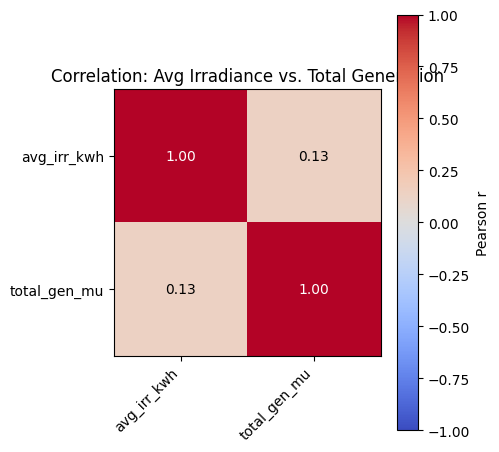

In [2]:
# Load and aggregate solar
solar = pd.read_csv("../../week1/day6/solar_irr.csv", parse_dates=["date"])
solar["month"] = solar["date"].dt.month
solar_monthly = solar.groupby("month")["irradiance_kwh"].mean().rename("avg_irr_kwh")

# Load and aggregate generation
gen = pd.read_csv("../day8/cea_generation.csv")
gen_monthly = gen.groupby("month")["generation"].sum().rename("total_gen_mu")

# Merge & corr
df = pd.concat([solar_monthly, gen_monthly], axis=1).reset_index().set_index("month")
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(5,5))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
labels = corr.columns
ticks = np.arange(len(labels))
plt.xticks(ticks, labels, rotation=45, ha="right")
plt.yticks(ticks, labels)
for i in ticks:
    for j in ticks:
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center",
                 color="white" if abs(corr.iloc[i,j])>0.5 else "black")
plt.title("Correlation: Avg Irradiance vs. Total Generation")
plt.tight_layout()
plt.show()

---

## 4. Forecast Comparison Plot

In this cell, I will:

- Load the full daily irradiance series from solar_irr.csv

- Split into train (all but last 7 days) and actuals (last 7 days)

- Compute naïve persistence and 7‑day moving‑average forecasts

- Plot history with both forecasts for comparison

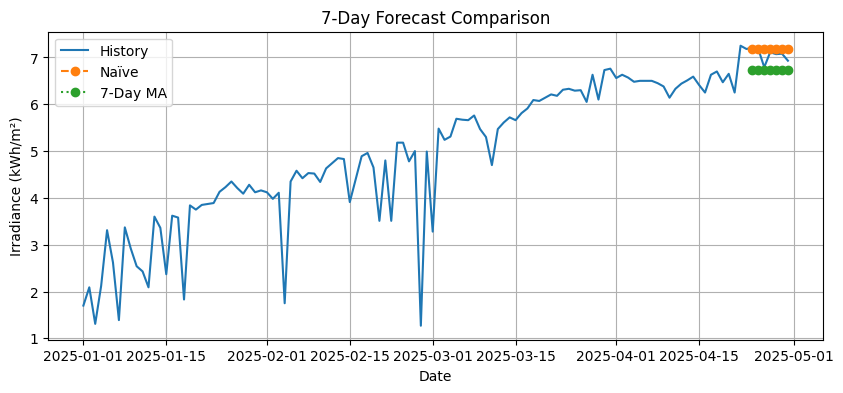

In [3]:
# Load series
solar = pd.read_csv("../../week1/day6/solar_irr.csv", parse_dates=["date"])
solar.set_index("date", inplace=True)
series = solar["irradiance_kwh"]

# Split
train, actuals = series[:-7], series[-7:]
future_idx = actuals.index

# Naïve forecast
naive = pd.Series([train.iloc[-1]]*7, index=future_idx, name="Naïve")

# MA forecast
ma_val = train.rolling(7).mean().iloc[-1]
ma = pd.Series([ma_val]*7, index=future_idx, name="7‑Day MA")

# Plot
plt.figure(figsize=(10,4))
plt.plot(series, label="History")
plt.plot(naive,  "--o", label="Naïve")
plt.plot(ma,     ":o",  label="7‑Day MA")
plt.title("7‑Day Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Irradiance (kWh/m²)")
plt.legend()
plt.grid(True)
plt.show()

---

## 5. SQL Snippet

In this cell, I will display my go‑to SQL window‑function query as formatted Markdown:

In [6]:
from IPython.display import Markdown, display

# Use a normal (single-quoted) Python string with explicit newlines
sql_md = (
    "```sql\n"
    "WITH monthly_totals AS (\n"
    "  SELECT region, month, SUM(generation) AS total_mu\n"
    "  FROM generation\n"
    "  GROUP BY region, month\n"
    ")\n"
    "SELECT * \n"
    "FROM monthly_totals\n"
    "WHERE total_mu > 800;\n"
    "```"
)

display(Markdown(sql_md))

```sql
WITH monthly_totals AS (
  SELECT region, month, SUM(generation) AS total_mu
  FROM generation
  GROUP BY region, month
)
SELECT * 
FROM monthly_totals
WHERE total_mu > 800;
```

---

## 6. Python Snippet

In this cell, I will display my manual MAE & RMSE calculation snippet as formatted Markdown:

In [7]:
py_md = (
    "```python\n"
    "# Manual MAE & RMSE (Day 13)\n"
    "import numpy as np\n\n"
    "def mae(a, f): return np.mean(np.abs(a - f))\n"
    "def rmse(a, f): return np.sqrt(np.mean((a - f)**2))\n\n"
    "print(\"Naïve:\", mae(actuals, naive), rmse(actuals, naive))\n"
    "print(\"7‑Day MA:\", mae(actuals, ma), rmse(actuals, ma))\n"
    "```"
)

display(Markdown(py_md))

```python
# Manual MAE & RMSE (Day 13)
import numpy as np

def mae(a, f): return np.mean(np.abs(a - f))
def rmse(a, f): return np.sqrt(np.mean((a - f)**2))

print("Naïve:", mae(actuals, naive), rmse(actuals, naive))
print("7‑Day MA:", mae(actuals, ma), rmse(actuals, ma))
```